In [3]:
import pandas as pd

In [4]:
census_data = pd.read_csv('./adult.data.csv')

In [5]:
census_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
census_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [10]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [69]:
census_data['race'].unique().shape[0]

5

In [15]:
census_data['race'] = census_data['race'].astype('category')

In [16]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  category
 9   sex             32561 non-null  object  
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  object  
 14  salary          32561 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


39.43354749885268

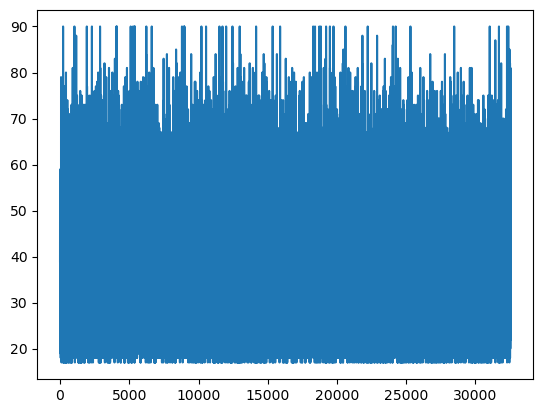

In [73]:
census_data['age'].plot()
census_data.loc[(census_data['sex'] == 'Male'), 'age'].mean()

In [18]:
census_data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [19]:
census_data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [41]:
advanced_educated = census_data.query('education in ("Bachelors","Masters","Doctorate")').copy()
advanced_educated.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [39]:
census_data['salary'] = census_data['salary'].astype('category')

In [68]:
n_advanced_educated_high_income = census_data.query('education in ("Bachelors","Masters","Doctorate") and salary == ">50K"').shape[0]
n_non_advanced_educated_high_income = census_data.query('education not in ("Bachelors","Masters","Doctorate") and salary == ">50K"').shape[0]
n_all = census_data.shape[0]
print(f'advanced_educated_high_income {n_advanced_educated_high_income} -> {(n_advanced_educated_high_income/n_all*100):.2f}%') 
print(f'non_advanced_educated_high_income {n_non_advanced_educated_high_income} -> {(n_non_advanced_educated_high_income/n_all*100):.2f}%') 
min_work_hours_per_week = census_data['hours-per-week'].min()
n_work_min_hours_high_income = census_data.loc[((census_data['hours-per-week'] == min_work_hours_per_week) & (census_data['salary'] == '>50K'))].shape[0]
print(f'work_min_hours_high_income {n_work_min_hours_high_income} -> {(n_work_min_hours_high_income/n_all*100):.2f}%') 

advanced_educated_high_income 3486 -> 10.71%
non_advanced_educated_high_income 4355 -> 13.37%
work_min_hours_high_income 2 -> 0.01%


In [67]:

#census_data['hours-per-week'].plot(kind='hist')
#census_data['hours-per-week'].describe()

work_min_hours_high_income 2 -> 0.01%


In [64]:
census_data.loc[(census_data['hours-per-week'] == min_work_hours_per_week)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
1036,66,Self-emp-inc,150726,9th,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,<=50K
1262,69,?,195779,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5590,78,?,363134,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5632,45,?,189564,Masters,14,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5766,62,?,97231,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5808,76,?,211574,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,<=50K
8447,67,?,244122,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
9147,75,?,260543,10th,6,Widowed,?,Other-relative,Asian-Pac-Islander,Female,0,0,1,China,<=50K
11451,27,Private,147951,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,White,Male,0,0,1,United-States,<=50K


In [108]:
country_name = census_data.query('salary == ">50K"')['native-country'].value_counts(normalize=True).to_frame().iloc[0].name
print(country_name)
value = census_data.query('salary == ">50K"')['native-country'].value_counts(normalize=True).iloc[0] *  100 
print(round(value, 2), type(value))
#census_data.query('salary == ">50K"')['native-country'].value_counts().plot(kind='bar')

United-States
91.46 <class 'numpy.float64'>


In [109]:
census_data.query('salary == ">50K"')['occupation'].value_counts(normalize=True).to_frame().iloc[0].name

'Exec-managerial'

In [1]:
import demographic_data_analyzer as dem_data_analyzer
dem_data_analyzer.calculate_demographic_data()

Number of each race:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: United-States
Highest percentage of rich people in country: 91.5%
Top occupations in India: Exec-managerial


{'race_count': race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
 Name: count, dtype: int64,
 'average_age_men': 39.4,
 'percentage_bachelors': 16.4,
 'higher_education_rich': 46.5,
 'lower_education_rich': 17.4,
 'min_work_hours': 1,
 'rich_percentage': 10.0,
 'highest_earning_country': 'United-States',
 'highest_earning_country_percentage': 91.5,
 'top_IN_occupation': 'Exec-managerial'}

In [1]:
%run main.py

..........
----------------------------------------------------------------------
Ran 10 tests in 0.093s

OK


Number of each race:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty


In [15]:
census_data.loc[(census_data['sex'] == 'Male'), 'age'].isna().any()

False

In [6]:
rich_mask = census_data['salary'] == '>50K'
india_mask = census_data['native-country'] == 'India'
census_data.loc[(rich_mask & india_mask)]['occupation'].value_counts(normalize=True).to_frame().iloc[0].name

'Prof-specialty'

In [30]:
high_salary = census_data['salary'] == '>50K'
living_in_iran = census_data['native-country'] == 'Iran'
living_in_us = census_data['native-country'] == 'United-States'
census_data.loc[(high_salary & living_in_us)].shape

census_data['low_salary'] = census_data['salary'] != '>50K'

In [94]:
salary_frame = pd.DataFrame(census_data.query('salary == ">50K"')['native-country'].value_counts())
salary_frame.columns = ['num_high_salary']
salary_frame['num_low_salary'] = census_data.query('salary != ">50K"')['native-country'].value_counts()
salary_frame['pct_high_salary'] = (salary_frame['num_high_salary'] / (salary_frame['num_high_salary'] + salary_frame['num_low_salary'])) * 100
salary_frame.sort_values(by=['pct_high_salary'], ascending=False).iloc[0]['pct_high_salary']
#,census_data.query('salary != ">50K"')['native-country'].value_counts())

41.86046511627907